## Random Variate Generation

### Inverse Transformations

The cumulative distribution function is uniformly distributed between 0 and 1. So, we can produce a random number and inverse function to get random number we want.

$$ x = F^{-1}(r)$$

#### Example:

Get a random vector uniformly distributed on a unit sphere.

To get such a vector, we need to consider the solid angle $dA = sin\theta d\theta d\phi$. We need to get a uniform distribution for solid angle. So the p.d.f is $f(A)dA = \frac{1}{4\pi}dA$.

Integrate to get c.d.f of $\theta$ and $\phi$ seperately:

$$F(\theta) = \int_0^{2\pi} d\phi \int_0^\theta \frac{1}{4\pi}sin\theta d\theta = \frac{1-cos\theta}{2}$$

and

$$F(\phi) = \int_0^\pi d\theta \int_0^\phi \frac{1}{4\pi}sin\theta d\phi = \frac{\phi}{2\pi}$$

Using inverse transformation, we can get:

$$\theta = arccos(1-2r_1)$$

and

$$\phi = 2\pi r_2$$

#### Code Example (Julia language):

Let's compare this method with spherical coordinate.

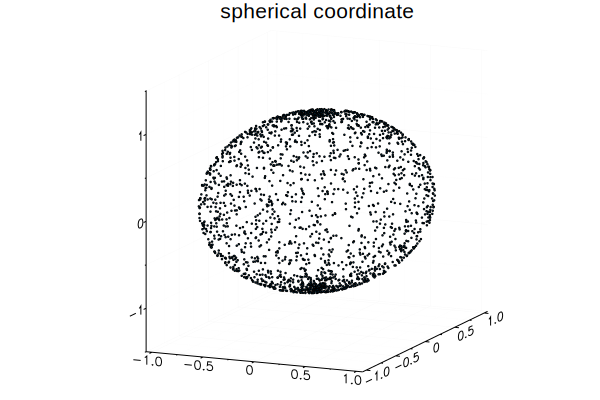

In [19]:
using Random
using Plots
rng = RandomDevice()

# get random vector through spherical coordinate
vector = Array{Float64}(undef, 3, 2000)
for i in 1:2000
    θ = rand(rng) * π
    ϕ = rand(rng) * 2π
    vector[1, i] = cos(ϕ)sin(θ)
    vector[2, i] = sin(ϕ)sin(θ)
    vector[3, i] = cos(θ)
end
plot(vector[1,:], vector[2,:], vector[3,:], t=:scatter, markersize=:0.5, leg=false, title="spherical coordinate")

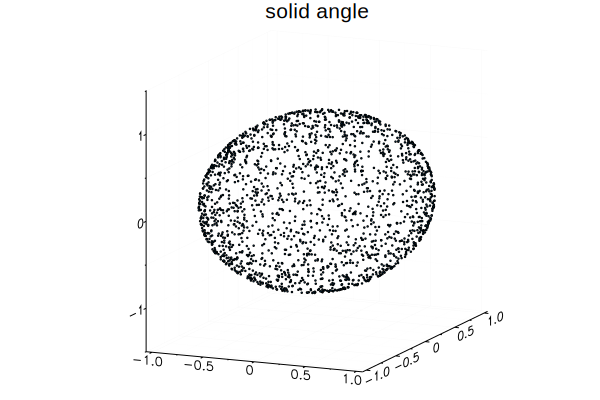

In [20]:
# get random vector using uniform distribution solid angle
vector = Array{Float64}(undef, 3, 2000)
for i in 1:2000
    θ = acos(1 - 2*rand(rng))
    ϕ = 2π * rand(rng)
    vector[1, i] = cos(ϕ)sin(θ)
    vector[2, i] = sin(ϕ)sin(θ)
    vector[3, i] = cos(θ)
end
plot(vector[1,:], vector[2,:], vector[3,:], t=:scatter, markersize=:0.5, leg=false, title="solid angle")